In [31]:
import os
import glob
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import BayesianRidge, LinearRegression, Ridge

In [32]:
DATA_PATH = "../output/vs_trains/*"
TRAIN_PATH = "../input/train.csv"
train = pd.read_csv(TRAIN_PATH)

In [33]:
list = []
results = []
for p in glob.glob(DATA_PATH):
    results.append(pd.read_csv(p))
all_result = pd.concat(results, axis=1).loc[:,~pd.concat(results, axis=1).columns.duplicated()]

In [34]:
#all_result.loc[all_result["賃料"]>100000]
val = all_result[all_result["exp1_poisson_upper100000_new"]>0]["exp1_poisson_upper100000_new"].values
np.where(all_result["賃料"])

(array([    0,     1,     2, ..., 31467, 31468, 31469]),)

In [35]:
all_result = all_result.dropna(axis=1)

In [36]:
df_corr = all_result.corr()
df_corr

,賃料,exp0_+address_poisson_word_out2_people_num7+ekiuserate_kyori_NOmeta,exp0_+address_gamma_outlin_3class+3meta_colsample4_floorrent+word_out2_people_num7+ekiuserate_kyori,exp0_+address_poisson_outlin+meta_TE,exp0_+address_poisson_outlin3class_TE_noWord_minchild3,exp0_+address_poisson_outlin3class_TE_noWord_ekipeople+meta,exp0_+address_poisson_outlin_3class+3meta_colsample4_floorrent+word_out2_people_num7,exp0_+address_poisson_outlin_3class+3meta_colsample4_floorrent+tika,exp0_+address_poisson_outlin_3class+3meta_colsample4_floorrent+word_out2_people_num7+ekiuserate,exp0_+address_poisson_outlin_3class+3meta_colsample4_floorrent+word_out2_people_num7+ekiuserate_kyori,...,choose_feature,exp0_+address_poisson_outlin3class_TE_noWord,up+und_thre_is_250000,exp0_+address_poisson_word_out2_people_num7+ekiuserate_kyori_NOmeta_NOtika,exp0_+address_poisson_outlin_3class,exp0_+address_poisson_outlin_3class+3meta_colsample4_floorrent+word,exp0_+address_poisson_outlin_3class+3meta_colsample4,exp0_+address_poisson_outlin_3class+3meta_colsample4_floorrent+word_out2,exp0_+address_poisson_outlin_3class+3meta_colsample4_floorrent+word_out2_people,exp0_+address_poisson_outlin=99.8
賃料,1.000000,0.981709,0.977896,0.975991,0.979488,0.979461,0.981851,0.981335,0.983195,0.982431,...,0.982953,0.980882,0.980568,0.979863,0.980972,0.981579,0.982010,0.981579,0.982179,0.979516
exp0_+address_poisson_word_out2_people_num7+ekiuserate_kyori_NOmeta,0.981709,1.000000,0.994537,0.988725,0.993042,0.991653,0.996029,0.995646,0.996538,0.996268,...,0.996562,0.992576,0.972997,0.997522,0.996360,0.995576,0.996028,0.995576,0.996040,0.995571
exp0_+address_gamma_outlin_3class+3meta_colsample4_floorrent+word_out2_people_num7+ekiuserate_kyori,0.977896,0.994537,1.000000,0.987325,0.991134,0.991849,0.996566,0.996112,0.996258,0.996665,...,0.996398,0.990933,0.970534,0.993931,0.994170,0.996149,0.995063,0.996149,0.996314,0.992151
exp0_+address_poisson_outlin+meta_TE,0.975991,0.988725,0.987325,1.000000,0.992671,0.995150,0.989334,0.990003,0.988761,0.989384,...,0.988668,0.993992,0.972649,0.988299,0.989337,0.989188,0.990220,0.989188,0.990053,0.985189
exp0_+address_poisson_outlin3class_TE_noWord_minchild3,0.979488,0.993042,0.991134,0.992671,1.000000,0.995459,0.992492,0.993012,0.992579,0.993058,...,0.992475,0.996916,0.971532,0.992652,0.992181,0.993050,0.992244,0.993050,0.992656,0.991813
exp0_+address_poisson_outlin3class_TE_noWord_ekipeople+meta,0.979461,0.991653,0.991849,0.995150,0.995459,1.000000,0.992598,0.992565,0.992609,0.992834,...,0.992475,0.995414,0.972982,0.990780,0.991289,0.992707,0.991889,0.992707,0.993046,0.989173
exp0_+address_poisson_outlin_3class+3meta_colsample4_floorrent+word_out2_people_num7,0.981851,0.996029,0.996566,0.989334,0.992492,0.992598,1.000000,0.997470,0.998400,0.998462,...,0.998425,0.992328,0.973013,0.995941,0.995748,0.997633,0.996342,0.997633,0.999324,0.994109
exp0_+address_poisson_outlin_3class+3meta_colsample4_floorrent+tika,0.981335,0.995646,0.996112,0.990003,0.993012,0.992565,0.997470,1.000000,0.997004,0.997662,...,0.996953,0.992900,0.971063,0.995071,0.996397,0.997821,0.996789,0.997821,0.997595,0.993861
exp0_+address_poisson_outlin_3class+3meta_colsample4_floorrent+word_out2_people_num7+ekiuserate,0.983195,0.996538,0.996258,0.988761,0.992579,0.992609,0.998400,0.997004,1.000000,0.998326,...,0.999784,0.992272,0.973149,0.995889,0.995398,0.997221,0.996495,0.997221,0.998335,0.994412
exp0_+address_poisson_outlin_3class+3meta_colsample4_floorrent+word_out2_people_num7+ekiuserate_kyori,0.982431,0.996268,0.996665,0.989384,0.993058,0.992834,0.998462,0.997662,0.998326,1.000000,...,0.998314,0.992912,0.972986,0.995906,0.995872,0.998027,0.996636,0.998027,0.998446,0.994258


/Users/ueda/.pyenv/versions/3.6.5/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 36035 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/ueda/.pyenv/versions/3.6.5/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 26009 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/ueda/.pyenv/versions/3.6.5/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 36035 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/ueda/.pyenv/versions/3.6.5/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 26009 missing from current font.
  font.set_text(s, 0, flags=flags)


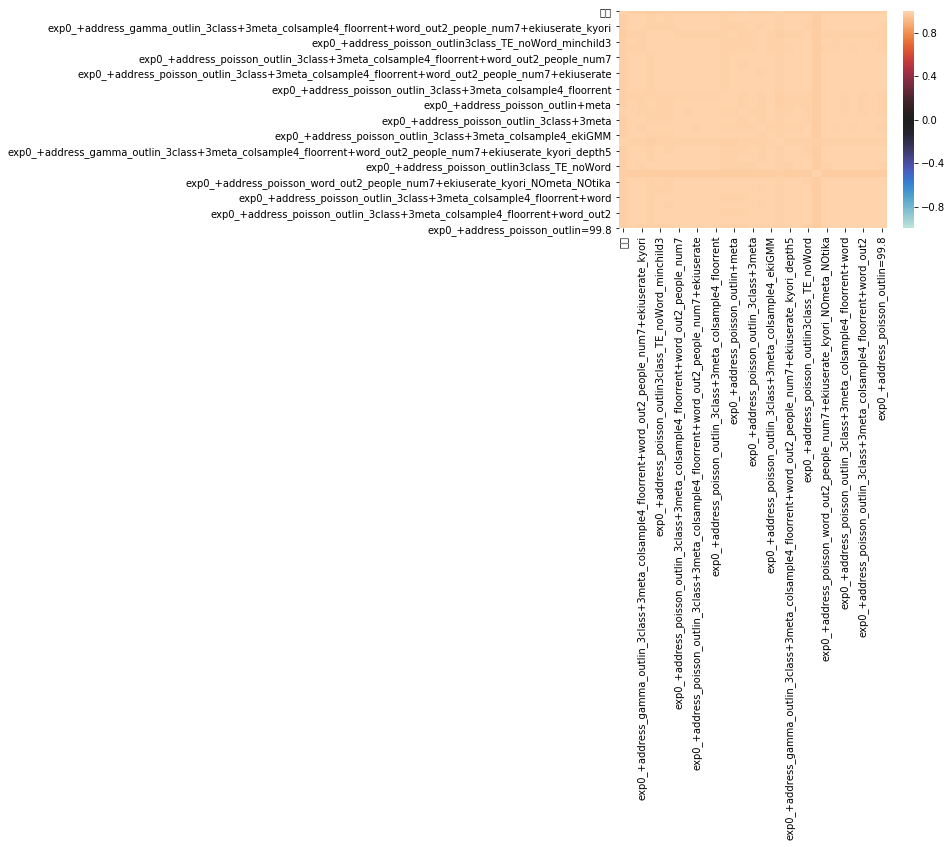

In [37]:
sns.heatmap(df_corr, vmax=1, vmin=-1, center=0)

In [38]:
#all_result[["y_oof_exp0_str_reg_nonleak_catbuilding", "y_oof_exp0_str_reg_15_cat_ekiname", "y_oof_exp0_group_reg_change_nonleak", "賃料"]]

In [39]:
file_name = [col for col in all_result.columns if col != "賃料"]

In [53]:
file_name.remove("exp0_+address_poisson_outlin_3class_RF")

In [54]:
y_train_df = pd.DataFrame()
x_train_df = pd.DataFrame()
for i, p in enumerate(file_name):
    path = f"../output/{p}/{p}.csv"
    try:
        y_train_df[f"model_{i}"] = pd.read_csv(path, header=None)[1]
        x_train_df[f"model_{i}"] = all_result[p]
    except:
        print(f"{path}")

../output/exp0_+address_poisson_outlin_3class+3meta_colsample4_floorrent/exp0_+address_poisson_outlin_3class+3meta_colsample4_floorrent.csv


In [55]:
x_train = x_train_df.values
x_test = all_result["賃料"]

In [56]:
#y_train_df = pd.DataFrame()
#y_train_df["model1"] = pd.read_csv("../output/up+und_thre_is_250000/up+und_thre_is_250000.csv", header=None)[1]
#y_train_df["model2"] = pd.read_csv("../output/exp0_+address_poisson_outlin+meta_TE/exp0_+address_poisson_outlin+meta_TE.csv", header=None)[1]
#y_train_df["model3"] = pd.read_csv("../output/exp0_+address_poisson_outlin+meta/exp0_+address_poisson_outlin+meta.csv", header=None)[1]

In [57]:
y_train = y_train_df.values

In [58]:
clf = BayesianRidge()

In [59]:
clf.fit(x_train, x_test)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
              fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [60]:
pred = clf.predict(y_train)

In [61]:
DATA_DIR = "../input/"
SUB_PATH = os.path.join(DATA_DIR, "sample_submit.csv")
sub = pd.read_csv(SUB_PATH, header=None)
sub[1] = pred
sub.to_csv("ens_bayesian_ridge.csv", index=False, header=None)

In [62]:
sub[1].max()

1670549.8766501204